### Julia Leite Galvão - RM: 550201
### Aline Fernandes Zeppelini - RM97966




# DATA SCIENCE & STATISTICAL COMPUTING : Gráficos com Matplotlib




In [55]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [63]:
df = pd.read_csv("List-of-best-selling-videogames.csv")


Excluindo erro no dataset


In [67]:
index_to_drop = df[df['Game'] == 'Super Scope 6'].index
df = df.drop(index_to_drop)

<h1>Quais são os jogos mais vendidos de todos os tempos?<h1>

<h3>O código abaixo seleciona os 10 jogos mais vendidos da plataforma nintendo de todos os tempos. <h3>

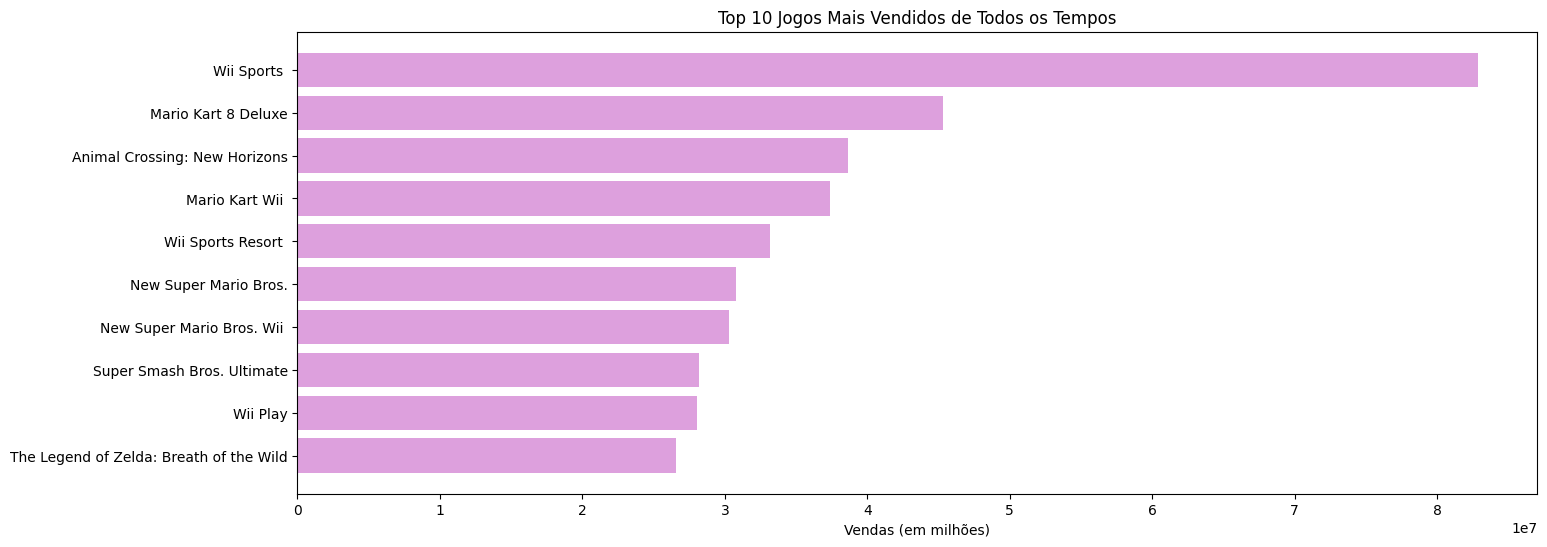

In [31]:
df_sorted = df.sort_values(by='Sales', ascending=False)
top_games = df_sorted.head(10)
plt.figure(figsize=(16, 6))
plt.barh(top_games['Game'], top_games['Sales'], color='plum')
plt.xlabel('Vendas (em milhões)')
plt.title('Top 10 Jogos Mais Vendidos de Todos os Tempos')

plt.gca().invert_yaxis()

plt.show()

<h1>Quais os melhores anos de vendas de jogos para a Nintendo?<h1>

<h3>O código seleciona os 5 anos com mais vendas de jogos da Nintendo <h3>

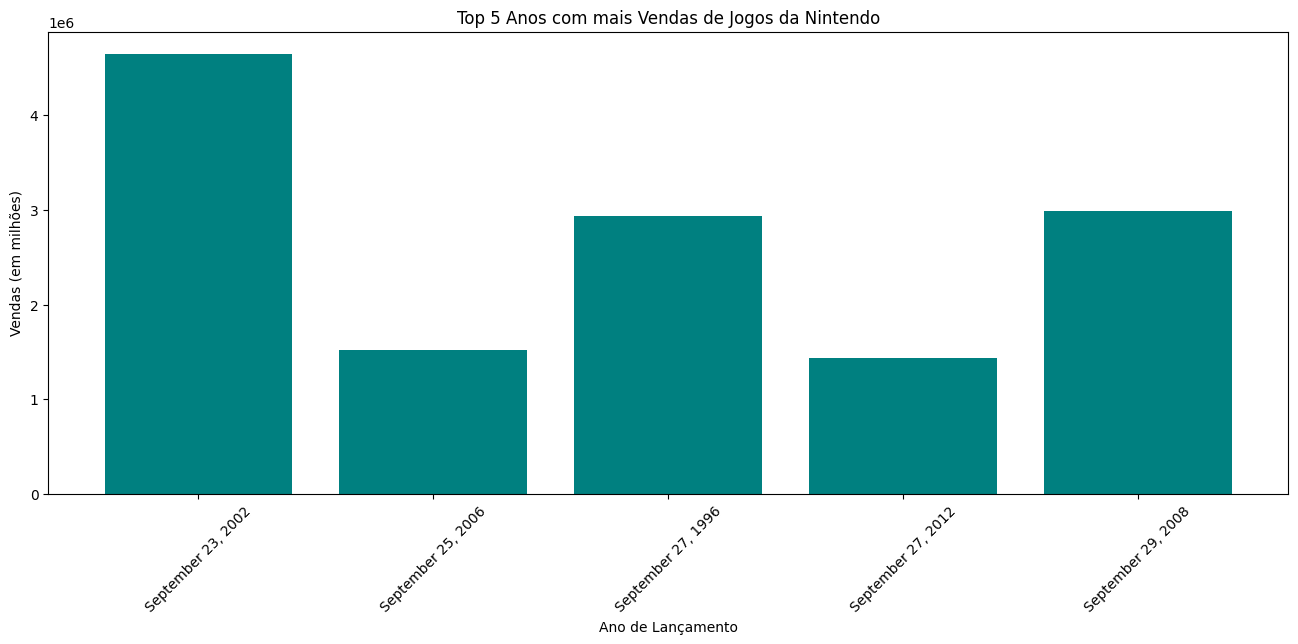

In [34]:
nintendo_games = df[df['Publisher'].str.contains('Nintendo', case=False)]
sales_by_year = nintendo_games.groupby('Release date')['Sales'].sum().reset_index()
sales_by_year_sorted = sales_by_year.sort_values(by='Release date')
top_years = sales_by_year_sorted.tail(5)
plt.figure(figsize=(16, 6))
plt.bar(top_years['Release date'], top_years['Sales'], color='teal')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas (em milhões)')
plt.title('Top 5 Anos com mais Vendas de Jogos da Nintendo')
plt.xticks(rotation=45)

plt.show()

<h1>Qual é a distribuição de vendas por desenvolvedor?<h1>
<h3>O código seleciona as vendas e os desenvolvedores, e faz uma porcentagem de vendasn por cada desenvolvedor e mostra em um gráfico de pizza.<h3>

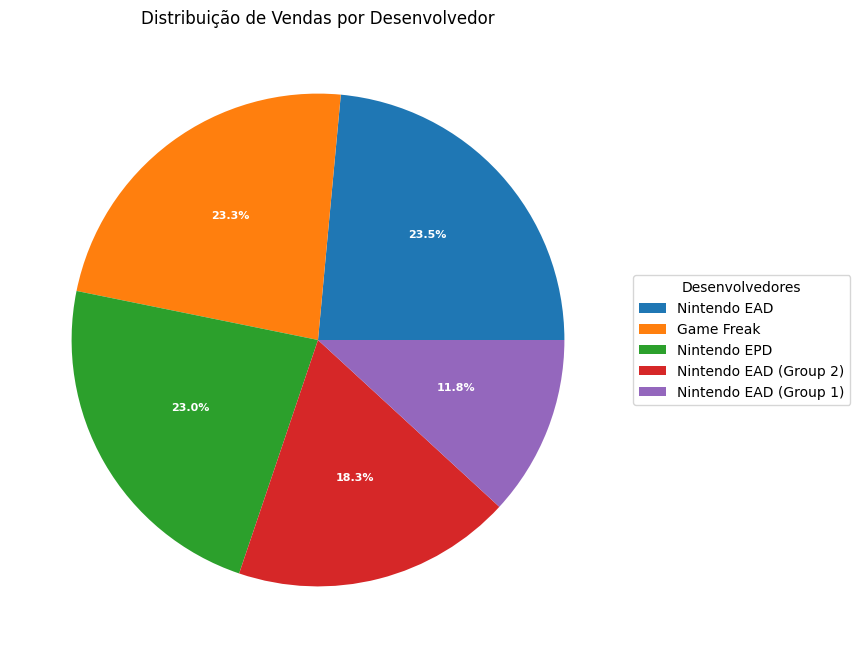

In [30]:
developer_sales = df.groupby('Developer')['Sales'].sum().nlargest(5)
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))
data = developer_sales.values
developers = developer_sales.index
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n"
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
ax.legend(wedges, developers,
          title="Desenvolvedores",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Distribuição de Vendas por Desenvolvedor")

plt.show()

<h1>Qual é a frequência de lançamentos depois dos anos 2000?<h1>
<h3>O código seleciona os jogos lançados depois dos anos 2000, e sua frequência.<h3>

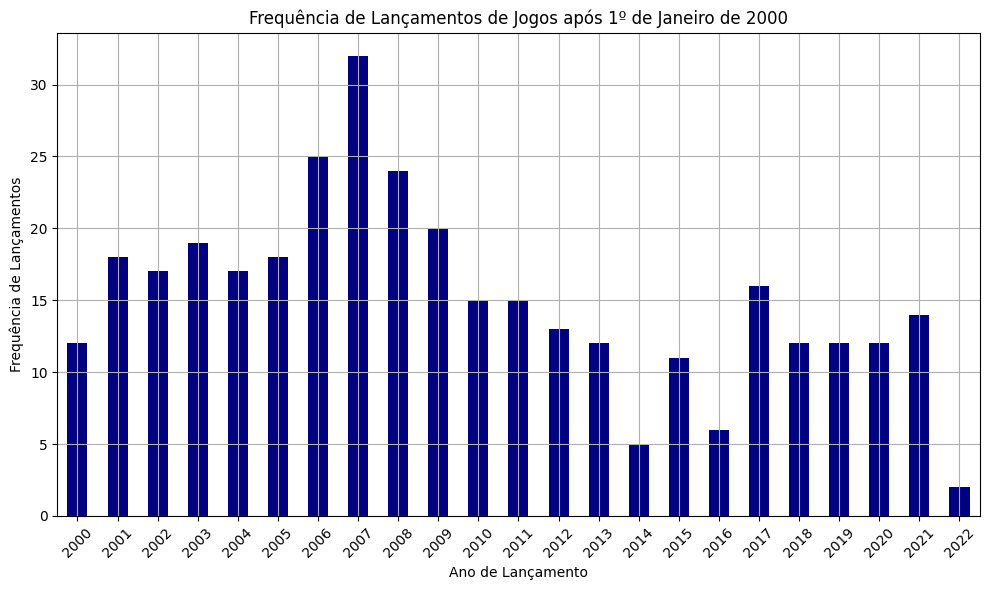

In [69]:
df['Release date'] = pd.to_datetime(df['Release date'])

# Filtrar os jogos lançados após 1º de janeiro de 2000
games_after_2000 = df[df['Release date'] >= pd.Timestamp('2000-01-01')]

# Calcular a frequência de lançamentos por ano
launch_frequency = games_after_2000['Release date'].dt.year.value_counts().sort_index()

# Criar o gráfico de barras para a frequência de lançamentos por ano
plt.figure(figsize=(10, 6))
launch_frequency.plot(kind='bar', color='navy')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência de Lançamentos')
plt.title('Frequência de Lançamentos de Jogos após 1º de Janeiro de 2000')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



<h1>Quais as maiores e piores vendas da Nintendo?<h1>
<h3>O código seleciona os top 3 jogos mais vendidos, e os 3 com menos vendas.<h3>

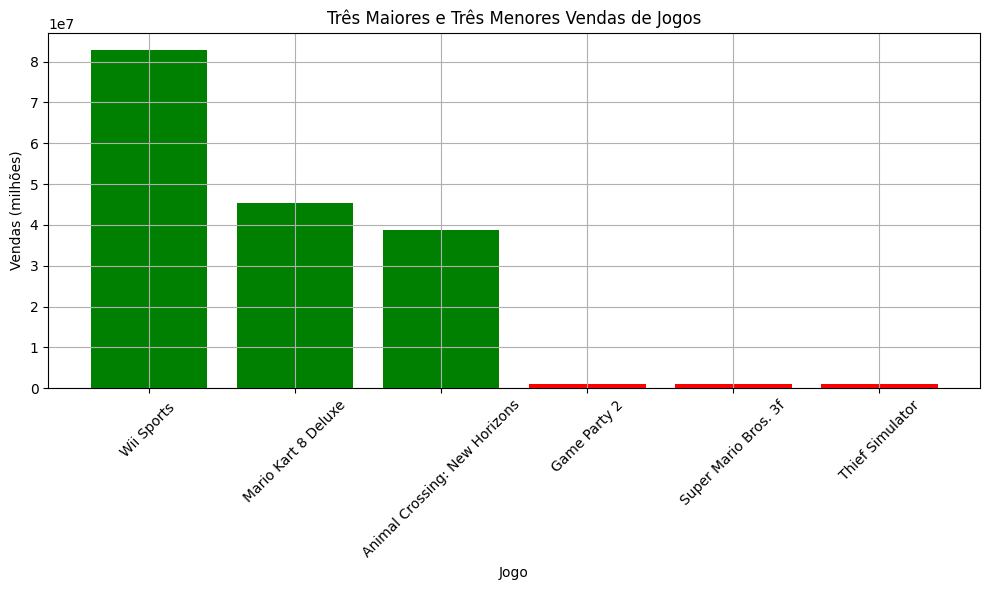

In [47]:
sorted_games = df.sort_values(by='Sales', ascending=False)

top_3_games = sorted_games.head(3)
bottom_3_games = sorted_games.tail(3)
games_to_plot = pd.concat([top_3_games, bottom_3_games])

plt.figure(figsize=(10, 6))
plt.bar(games_to_plot['Game'], games_to_plot['Sales'], color=['green', 'green', 'green', 'red', 'red', 'red'])
plt.xlabel('Jogo')
plt.ylabel('Vendas (milhões)')
plt.title('Três Maiores e Três Menores Vendas de Jogos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

<h1>Qual é o gênero mais vendido da Nintendo?<h1>
<h3>O código abaixo seleciona os generos disponiveis no dataset e compara com a qauntidade de vendas de cada jogo..<h3>

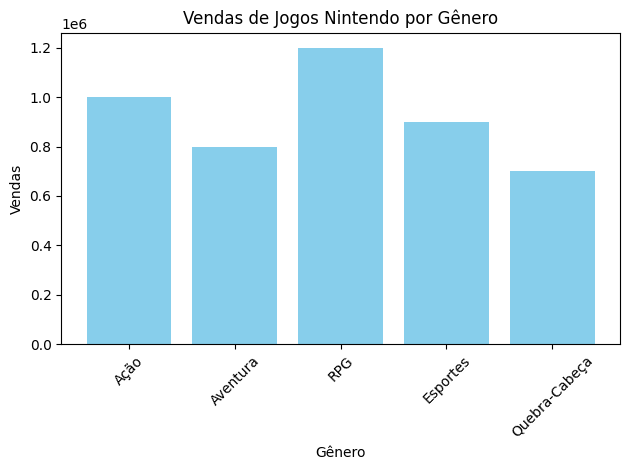

In [73]:
generos = ['Ação', 'Aventura', 'RPG', 'Esportes', 'Quebra-Cabeça']
vendas = [1000000, 800000, 1200000, 900000, 700000]

plt.bar(generos, vendas, color='skyblue')
plt.xlabel('Gênero')
plt.ylabel('Vendas')
plt.title('Vendas de Jogos Nintendo por Gênero')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<h1>Qual é a tendência de vendas ao longo dos anos?<h1>
<h3>O código seleciona as vendas e os periodos de tempos aleatorios, mostrando o aumento e/ou diminuição de vendas.<h3>

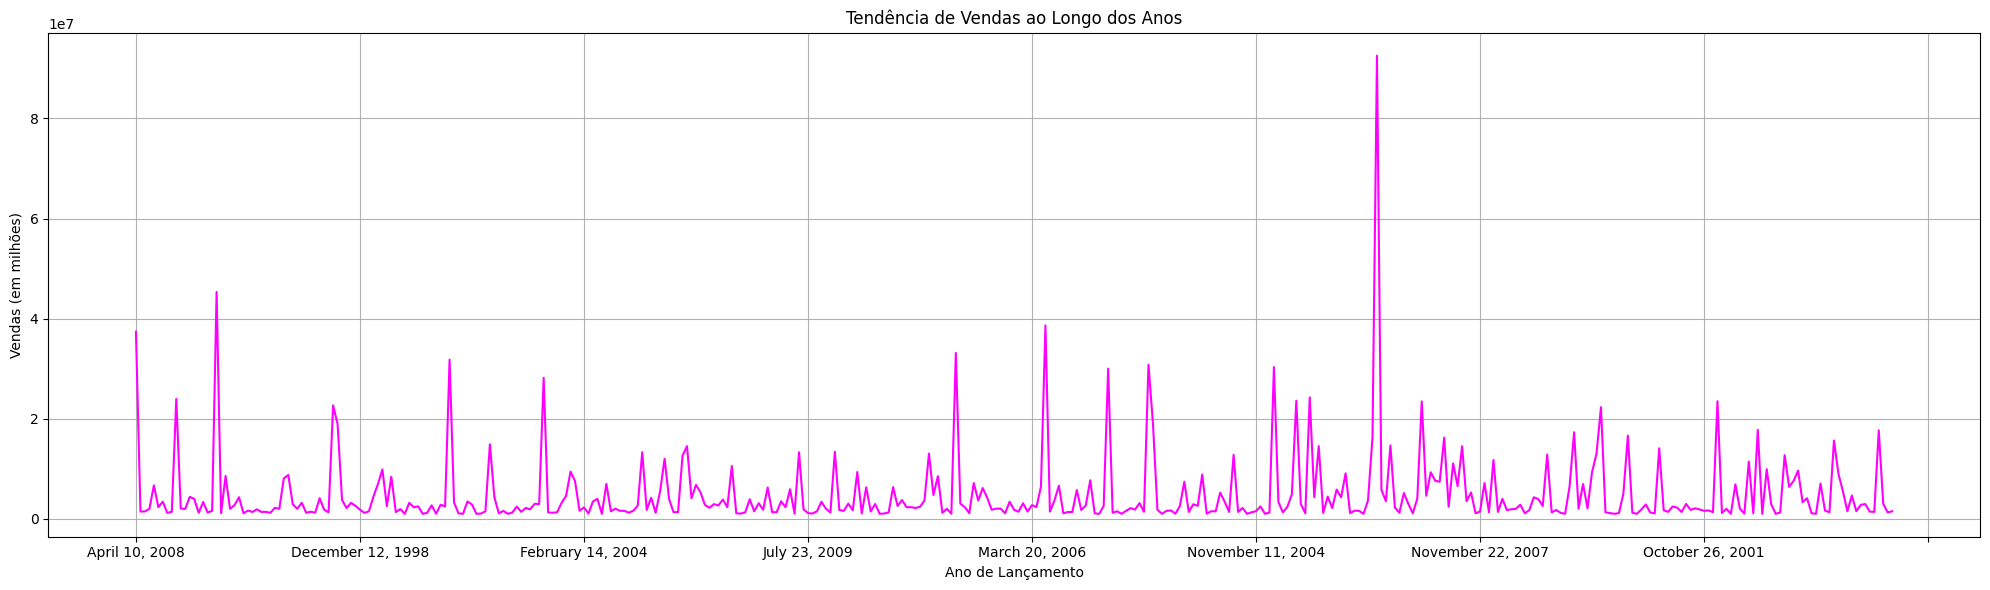

In [66]:
yearly_sales = df.groupby('Release date')['Sales'].sum()
plt.figure(figsize=(20, 6))
yearly_sales.plot(kind='line', color='magenta')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas (em milhões)')
plt.title('Tendência de Vendas ao Longo dos Anos')
plt.grid(True)
plt.tight_layout()

plt.show()